## Data preprocessing

source: https://archive.ics.uci.edu/dataset/186/wine+quality

### Imports

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Data load

In [71]:
df_red = pd.read_csv("data/winequality-red.csv", sep=";")
df_white = pd.read_csv("data/winequality-white.csv", sep=";")

# data sets have the same structure
# print(df_red.info())
# print(df_white.info())


### Data catenation
Those data have one cathegorical variable _type_. As there are two .csv files, one for each variable, it is neccessary to transform two files without _type_ variable to one table with new column(s) to capture the new variable _type_. Because there is just one cathegorical variable which has only two values, the transformation could be done using on-hot trick without significant size/dimension affection of the new data.

In [72]:
# add new on-hot columns to each dataset
df_red["red"] = 1
df_red["white"] = 0

df_white["red"] = 0
df_white["white"] = 1

# catenate both datasets together
df = pd.concat([df_red, df_white], ignore_index=True)

# catenation were successful, column names and row count as expected
# print(df.info())
# print(df.head())

### Data preprocessing
There are a lot of data preprocessing methods which should be used in ussual case. But in this dataset, a lot of potentional problems cannot occur. There is not any _date_ variable, neither _strings_ or other objects. Using the _info()_ method of pandas dataframe, we can see that the dataset has none of _None_ or _NAN_ values, so all are presented, and there are also just _int_ or _float_ variables. Moreover, all columns have same number of rows.

In [73]:
# there is not any None value in any column
# print(df.isna().sum())

I also think that there is no need to do any normalization, transformation etc. The only thing which should be checked is the column range for all measurements. The dataset were study in https://doi.org/10.1016/j.dss.2009.05.016., so the provided ranges are correct based on the study.

In [74]:
# remove duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(6497, 14)
(5320, 14)


In [75]:
# df["free sulfur dioxide"] = df["free sulfur dioxide"] / 1000
# df["total sulfur dioxide"] = df["total sulfur dioxide"] / 1000

In [76]:
# Scale the features and target variable to the range [0, 1]
print(df.describe())
features = df.drop(columns=["quality"]).columns
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000         

In [77]:
# Standardize features
features = df.drop(columns=["quality", "red", "white"]).columns
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

<Axes: >

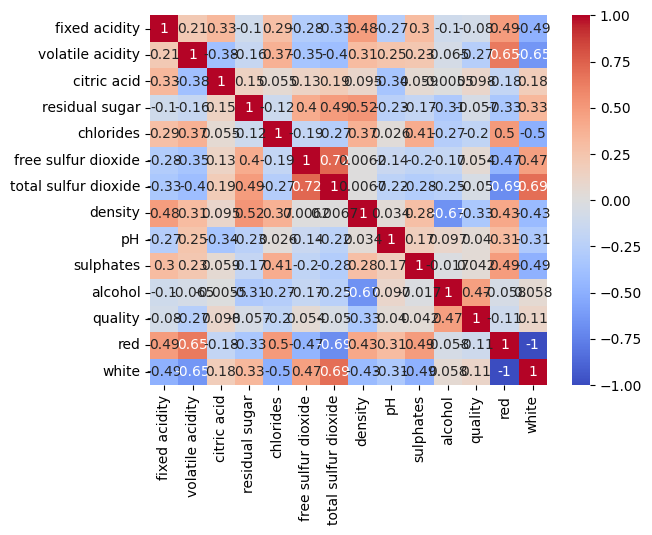

In [78]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [79]:
# put wine quality as a final column
cols = list(df.columns)
cols[-3], cols[-1] = cols[-1], cols[-3]
df = df[cols]

### Save prepared data

In [80]:
# df = df.sample(frac = 1)

In [81]:
# put the quality to the very end
df.to_csv("data/wine_prepared.csv", index=False)

In [46]:
print(df.describe())
print(df.info())
print(df.head())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   5.320000e+03      5.320000e+03  5.320000e+03    5.320000e+03   
mean    1.702898e-16      6.878374e-17 -3.906649e-17    4.674623e-17   
std     1.000094e+00      1.000094e+00  1.000094e+00    1.000094e+00   
min    -2.588145e+00     -1.570028e+00 -2.164515e+00   -9.886039e-01   
25%    -6.177717e-01     -6.784048e-01 -5.334545e-01   -7.219228e-01   
50%    -1.630701e-01     -2.623138e-01 -5.772841e-02   -5.219120e-01   
75%     3.674151e-01      3.915434e-01  5.539194e-01    5.448122e-01   
max     6.581671e+00      7.346207e+00  9.116989e+00    1.350107e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  5.320000e+03         5.320000e+03          5.320000e+03  5.320000e+03   
mean  -5.142086e-17        -6.945155e-17          3.606138e-17 -4.273941e-17   
std    1.000094e+00         1.000094e+00          1.000094e+00  1.000094e+00   
min   -1.293816e+00        -1.6